# Problem Statement

## Objectives

The main goal of this case study is to build ML models to predict churn. The predictive models we're going to construct will serve the following purposes:

1. **Predict Churn:**
   - We can use ML models to predict whether a high-value customer will churn or not, in the near future (i.e., churn phase).
   - Action Steps: Based on predictions, we can take action steps such as providing special plans, discounts on recharge, etc.

2. **Identify Important Variables:**
   - We can use ML models to identify important variables that are strong predictors of churn.
   - Insight: These variables may also indicate why customers choose to switch to other networks.

**Evaluation Metrics:**
- Although overall accuracy will be the primary evaluation metric, we should consider other metrics like precision, recall, etc.
- Example: In one scenario, we may need higher accuracy in identifying customers who'll definitely churn.

**Recommendations:**
- Based on our observations, we can recommend strategies to manage customer churn effectively.

**Note:**
- Multiple models may be necessary to fulfill the objectives.
- We should consider using dimensionality reduction techniques like PCA before building predictive models.

**Modeling Approach:**
- We can use PCA to reduce dimensionality.
- After PCA, we can employ any classification model for churn prediction.
- Note: PCA components are not easy to interpret; thus, another model is needed to identify important predictor attributes.

**Second Model:**
- We'll build another model to identify important predictor attributes.
- Consider logistic regression or a model from the tree family.


# Telecom Churn Analysis Steps

### 1. Data Understanding, Preparation, and Pre-Processing
- **Data Understanding:** Identify potentially useful and non-useful attributes. Estimate variable importance and impact.
- **Data Preparation:** Perform data cleaning, missing values imputation, outlier removal, and column level standardization (e.g., date, etc.).

### 2. Exploratory Data Analysis (EDA)
- **Basic Preliminary Data Analysis:** Find the correlation between variables and create scatter plots to identify relationships between variables.
- **Advanced Data Analysis:** Plot relevant heatmaps, histograms, and perform basic clustering to find patterns in the data.

### 3. Feature Engineering and Variable Transformation
- **Feature Engineering:** Perform one or more methods on attributes that can lead to the creation of a new potentially useful variable (e.g., day from the date).
- **Variable Transformation:** Apply categorical variable transformations to turn into numerical data and numerical variable transformations to scale data.

### 4. Model Selection, Model Building, and Prediction
- **Model Selection:** Identify the type of problem and make a list of decisive models from all available choices.
- **Model Building:** Choose a training mechanism (e.g., cross-validation, etc.) and tune hyperparameters of each model.
- **Prediction:** Test each model on the respective model evaluation metric, choose the best model based on the fit of the data set and output variable. Use ensemble options to improve the efficacy based on the evaluation metric stated in the problem statement.


## Customer Churn

Customer churn refers to the **rate at which customers stop doing business with a company**. It's a critical metric for businesses, particularly those with subscription or recurring revenue models.

Here's a breakdown of the definition:

* **Customers:** This refers to any individual or organization that interacts with a company's products or services.
* **Stop Doing Business:** This encompasses various actions indicating a customer is no longer engaged, such as canceling a subscription, not renewing a membership, or ceasing to use a product/service.

In essence, churn measures the **leakage** within a customer base over a specific period. 

## Customer Churn: Usage and High-Value Customers

Customer churn, as we saw earlier, is the rate at which customers stop using a company's product or service. But churn can be further categorized based on customer behavior and value. Here, we'll explore two specific types:

**1. Usage-Based Churn**

* **Concept:** Usage-based churn refers to customers who churn due to **low engagement or infrequent use** of the product/service. 
* **Identification:** Businesses with tiered subscription plans or freemium models can often identify usage-based churn. Customers who consistently fall within the lowest usage tiers or never upgrade from free plans might be at risk of churning.
* **Example:**  A cloud storage service offers free storage with limited capacity. Users who consistently reach storage limits without upgrading to paid plans with higher capacity exhibit usage-based churn behavior.

**2. High-Value Customer Churn**

* **Concept:** High-value churn refers to the loss of customers who generate significant revenue or contribute heavily to a company's growth. 
* **Identification:** This type of churn is crucial to identify as high-value customers contribute significantly to the bottom line. Businesses can analyze customer purchase history, subscription plans, or engagement metrics to pinpoint high-value customers.
* **Example:** An e-commerce platform identifies customers who consistently place large orders or subscribe to premium memberships. Losing such customers is considered high-value churn.

Understanding these different types of churn allows companies to implement targeted strategies for customer retention:

* **Reduce Usage-Based Churn:**  
    * Implement onboarding tutorials and user guides to improve product familiarity.
    * Design personalized marketing campaigns to highlight features relevant to specific customer segments.
    * Offer tiered subscription plans catering to different usage needs.

* **Minimize High-Value Customer Churn:**  
    * Conduct customer satisfaction surveys to understand their needs and concerns.
    * Provide dedicated customer support channels for high-value customers.
    * Offer loyalty programs or exclusive benefits to incentivize continued engagement.
  
By analyzing churn data and understanding the reasons behind customer departures, businesses can develop effective strategies to retain their customer base and ensure long-term growth. 

In [66]:
# Import Data 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import IsolationForest

# Assign the dataframe with the file
telecom_data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print("Telecom churn data successfully loaded!")

Telecom churn data successfully loaded!


In [67]:
# We dont want the results to be truncated
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [68]:
telecom_data.describe(include='all')


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

In [69]:
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [70]:
def data_quality_report(df, target_column=None):
    """
    Performs a data quality check on the given DataFrame and provides a summary of issues.

    Parameters:
    - df: DataFrame: The input DataFrame to be checked.
    - target_column: str, optional: The name of the target column for class distribution analysis.

    Returns:
    - str: A message indicating the completion of the data quality check.
    """
    # Number of rows and columns
    num_rows = df.shape[0]
    num_columns = df.shape[1]
    
    # Data types count
    data_types_count = df.dtypes.value_counts()
    
    # Number of null values in each column
    null_counts = df.isnull().sum()
    
    # Null percentage in each column
    null_percentage = (null_counts / num_rows) * 100
    
    # Sort null percentage in descending order
    null_percentage_sorted = null_percentage.sort_values(ascending=False)
    
    # Number of unique values in each column
    unique_counts = df.nunique()
    
    # Summary report
    print("Summary of Data Quality and Data Related Issues:")
    print("------------------------------------------------")
    print(f"Number of Rows: {num_rows}")
    print(f"Number of Columns: {num_columns}")
    print(f"Number of Float data type: {data_types_count.get('float64', 0)}")
    print(f"Number of Int data type: {data_types_count.get('int64', 0)}")
    print(f"Number of Object data type: {data_types_count.get('object', 0)}")
    print("\n")
    
    print("Percentage of Null Values in Each Column (Descending Order):")
    print(null_percentage_sorted.apply(lambda x: f"{x:.2f}%"))
    print("\n")
    
    print("Number of Unique Values in Each Column:")
    print(unique_counts)
    print("\n")
    
    # Additional data quality checks
    
    # Check for class imbalance in the target variable (if applicable)
    if target_column:
        print("Class Distribution in Target Variable:")
        print(df[target_column].value_counts())
        print("\n")
    return "Data Quality Check Completed."

In [71]:
data_quality_report(telecom_data, target_column='churn_probability')


Summary of Data Quality and Data Related Issues:
------------------------------------------------
Number of Rows: 69999
Number of Columns: 172
Number of Float data type: 135
Number of Int data type: 0
Number of Object data type: 9


Percentage of Null Values in Each Column (Descending Order):
arpu_3g_6                   74.90%
count_rech_2g_6             74.90%
night_pck_user_6            74.90%
arpu_2g_6                   74.90%
date_of_last_rech_data_6    74.90%
total_rech_data_6           74.90%
av_rech_amt_data_6          74.90%
max_rech_data_6             74.90%
count_rech_3g_6             74.90%
fb_user_6                   74.90%
night_pck_user_7            74.48%
date_of_last_rech_data_7    74.48%
total_rech_data_7           74.48%
max_rech_data_7             74.48%
fb_user_7                   74.48%
count_rech_2g_7             74.48%
count_rech_3g_7             74.48%
arpu_3g_7                   74.48%
av_rech_amt_data_7          74.48%
arpu_2g_7                   74.48%
count_

'Data Quality Check Completed.'

## Key Points Regarding Missing Data:

* **Missing Values (NaN) Represent No Recharge:** These likely indicate customers didn't recharge in a specific month (months 6, 7, 8 in this context).
* **Dropping Null Values Not Advisable:** Removing them would erase valuable information about non-recharge periods.
* **Missing Values Impact Recharge-Related Statistics:** Statistics like "Total Recharge Data" or "Average Recharge Amount" will naturally be null for months with no recharge activity.

## Solution: Imputation with Zeros

* Replace missing values with zeros. This acknowledges the absence of recharge while preserving data structure for analysis.

In [72]:
def data_segregation(df):
    """
    Segregates the columns of the given DataFrame into categorical, ID, and numeric types.
    
    Parameters:
    - df (DataFrame): The input DataFrame
    
    Returns:
    - categorical_df (DataFrame): DataFrame containing only the categorical columns
    - numerical_df (DataFrame): DataFrame containing only the numeric columns
    - id_df (DataFrame): DataFrame containing only the ID columns
    - categorical_columns (list): List of column names categorized as categorical
    - numerical_columns (list): List of column names categorized as numeric
    - id_columns (list): List of column names categorized as ID
    """
    # Categorize columns into Categorical, ID, and Numeric
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    id_columns = ['id', 'circle_id']  # Assuming these are the ID columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Print count of each type
    print("Count of Categorical Columns:", len(categorical_columns), f"- These are the columns mostly Date - {categorical_columns}")
    print("Count of ID Columns:", len(id_columns), f"- {id_columns}")
    print("Count of Numeric Columns:", len(numerical_columns))
    print("\n")
    
    # Create new dataframes
    categorical_df = df[categorical_columns]
    numerical_df = df[numerical_columns]
    id_df = df[id_columns]
    
    return categorical_df, numerical_df, id_df

categorical_df, numerical_df, id_df = data_segregation(telecom_data)

Count of Categorical Columns: 9 - These are the columns mostly Date - ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']
Count of ID Columns: 2 - ['id', 'circle_id']
Count of Numeric Columns: 163




In [73]:
data_quality_report(categorical_df)

Summary of Data Quality and Data Related Issues:
------------------------------------------------
Number of Rows: 69999
Number of Columns: 9
Number of Float data type: 0
Number of Int data type: 0
Number of Object data type: 9


Percentage of Null Values in Each Column (Descending Order):
date_of_last_rech_data_6    74.90%
date_of_last_rech_data_7    74.48%
date_of_last_rech_data_8    73.69%
date_of_last_rech_8          3.52%
date_of_last_rech_7          1.76%
date_of_last_rech_6          1.57%
last_date_of_month_8         1.05%
last_date_of_month_7         0.57%
last_date_of_month_6         0.00%
dtype: object


Number of Unique Values in Each Column:
last_date_of_month_6         1
last_date_of_month_7         1
last_date_of_month_8         1
date_of_last_rech_6         30
date_of_last_rech_7         31
date_of_last_rech_8         31
date_of_last_rech_data_6    30
date_of_last_rech_data_7    31
date_of_last_rech_data_8    31
dtype: int64




'Data Quality Check Completed.'

- **last_date_of_month_6**, **last_date_of_month_7**, **last_date_of_month_8**: These columns have only 1 unique value each. Since these columns have no variability across the dataset, they don't contribute any information to the analysis and can be safely dropped.

- **date_of_last_rech_6**, **date_of_last_rech_7**, **date_of_last_rech_8**: These columns have varying numbers of unique values (30, 31). But, it doesn't cotributing to our analaysis for the current scope.
- **date_of_last_rech_data_6**, **date_of_last_rech_data_7**, **date_of_last_rech_data_8**: Similar to the previous set, these columns have varying numbers of unique values (30, 31). But, it doesn't cotributing to our analaysis for the current scope.


In [74]:
telecom_data[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]] = telecom_data[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]].apply(lambda x: x.fillna(0))


In [76]:
telecom_data = telecom_data.drop(columns=categorical_df.columns.tolist()+id_df.columns.tolist())


In [77]:
telecom_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,NaN,0.0,NaN,NaN,1.0,NaN,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94

In [80]:
def get_month_columns(df, month_identifier):
    """
    Returns columns associated with the specified month identifier.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - month_identifier (str): The identifier for the month columns (e.g., '6' for June).

    Returns:
    - list: List of column names associated with the specified month identifier.
    """
    month_cols = df.filter(like=f"_{month_identifier}", axis=1).columns.tolist()
    return month_cols

month_cols = get_month_columns(telecom_data, '6')
print(len(month_cols))
print(month_cols)

51
['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'fb_user_6']


In [81]:
data_quality_report(telecom_data)

Summary of Data Quality and Data Related Issues:
------------------------------------------------
Number of Rows: 69999
Number of Columns: 161
Number of Float data type: 135
Number of Int data type: 0
Number of Object data type: 0


Percentage of Null Values in Each Column (Descending Order):
night_pck_user_6      74.90%
fb_user_6             74.90%
count_rech_3g_6       74.90%
count_rech_2g_6       74.90%
arpu_3g_6             74.90%
arpu_2g_6             74.90%
count_rech_2g_7       74.48%
arpu_3g_7             74.48%
fb_user_7             74.48%
night_pck_user_7      74.48%
arpu_2g_7             74.48%
count_rech_3g_7       74.48%
arpu_3g_8             73.69%
arpu_2g_8             73.69%
count_rech_3g_8       73.69%
count_rech_2g_8       73.69%
night_pck_user_8      73.69%
fb_user_8             73.69%
isd_og_mou_8           5.29%
loc_ic_t2t_mou_8       5.29%
std_og_t2c_mou_8       5.29%
spl_og_mou_8           5.29%
og_others_8            5.29%
std_og_mou_8           5.29%
std_ic_t2o

'Data Quality Check Completed.'

In [93]:
def select_monthly_columns(df, feature_pattern):
    """
    Selects columns related to the specified feature pattern for all months.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - feature_pattern (str): The pattern of the feature columns (e.g., 'night_pck_user_*').

    Returns:
    - list: List of column names related to the specified feature pattern for all months.
    """
    month_columns = []
    for month in ['6', '7', '8']:
        month_columns.extend(df.filter(like=f"{feature_pattern}_{month}", axis=1).columns.tolist())
    return month_columns

In [94]:
# Since fb_user and night pack are the important columns.So, we can't drop it, instead lets impute it. Observe it has huge percentage of null.
telecom_data[select_monthly_columns(telecom_data, 'night_pck_user')] = telecom_data[select_monthly_columns(telecom_data, 'night_pck_user')].fillna(-1)
telecom_data[select_monthly_columns(telecom_data, 'fb_user')] = telecom_data[select_monthly_columns(telecom_data, 'fb_user')].fillna(-1)



In [95]:
# Lets drop all the columns which are having more than 70% of nulls.

def drop_null_columns(df, threshold):
    """
    Drops columns from the DataFrame with more than the specified percentage of null values.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - threshold (float): The threshold percentage for null values (e.g., 0.7 for 70%).

    Returns:
    - DataFrame: The DataFrame with columns dropped based on the specified threshold.
    """
    # Calculate the number of rows
    num_rows = df.shape[0]
    
    # Calculate the threshold count of null values
    threshold_count = num_rows * threshold
    
    # Drop columns with null values exceeding the threshold count
    df.dropna(axis=1, thresh=threshold_count, inplace=True)
    
    return df

telecom_data = drop_null_columns(telecom_data, 0.7) # Delete columns with more than 70% of nulls

In [97]:
data_quality_report(telecom_data)

Summary of Data Quality and Data Related Issues:
------------------------------------------------
Number of Rows: 69999
Number of Columns: 149
Number of Float data type: 123
Number of Int data type: 0
Number of Object data type: 0


Percentage of Null Values in Each Column (Descending Order):
std_ic_t2t_mou_8      5.29%
spl_og_mou_8          5.29%
loc_og_t2c_mou_8      5.29%
loc_og_mou_8          5.29%
std_og_t2t_mou_8      5.29%
std_og_t2m_mou_8      5.29%
std_og_t2f_mou_8      5.29%
std_og_t2c_mou_8      5.29%
std_og_mou_8          5.29%
isd_og_mou_8          5.29%
og_others_8           5.29%
loc_og_t2m_mou_8      5.29%
spl_ic_mou_8          5.29%
loc_ic_t2t_mou_8      5.29%
loc_ic_t2m_mou_8      5.29%
loc_ic_t2f_mou_8      5.29%
loc_ic_mou_8          5.29%
std_ic_t2m_mou_8      5.29%
std_ic_t2f_mou_8      5.29%
std_ic_t2o_mou_8      5.29%
loc_og_t2f_mou_8      5.29%
std_ic_mou_8          5.29%
roam_ic_mou_8         5.29%
roam_og_mou_8         5.29%
loc_og_t2t_mou_8      5.29%
onnet_

'Data Quality Check Completed.'

In [105]:
def filter_and_drop_single_unique_values(df, drop=False):
    """
    Filters the DataFrame to include only columns with a single unique value,
    and optionally drops these columns from the DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - drop (bool): Whether to drop columns with a single unique value (default: False).

    Returns:
    - DataFrame: The filtered DataFrame containing columns with a single unique value,
      or the original DataFrame if drop=False.
    """
    # Calculate the number of unique values for each column
    unique_value_counts = df.nunique()
    
    # Create a DataFrame from the unique value counts
    unique_value_df = pd.DataFrame({'Column': unique_value_counts.index, 'Unique_Values': unique_value_counts.values})
    
    # Filter to include only columns with a single unique value
    single_unique_df = unique_value_df[unique_value_df['Unique_Values'] == 1]
    
    # If drop=True, drop the columns with a single unique value
    if drop:
        columns_to_drop = single_unique_df['Column'].tolist()
        df.drop(columns=columns_to_drop, inplace=True)
        return df, f"Dropped these Columns as there was only one unique value: {', '.join(columns_to_drop)}"
    else:
        return single_unique_df

telecom_data, message = filter_and_drop_single_unique_values(telecom_data, drop=True)
print(message)
telecom_data = telecom_data.fillna(0) # For the remaining impute zero, we have thoroughly gone through the data to come to this conclusion


Dropped these Columns as there was only one unique value: 


In [109]:
telecom_data["churn_probability"].value_counts(normalize=True)


churn_probability
0    0.898113
1    0.101887
Name: proportion, dtype: float64

Based on the analysis performed:

There are no null values present in the dataset.
It's observed that there are no columns with a single unique value, indicating potential redundancy.
After considering the absence of null values and the presence of single unique values, we can conclude that the dataset is clean in terms of missing data.

In [116]:
telecom_data.columns.tolist()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

# EDA and Outlier Detection

> Using IQR

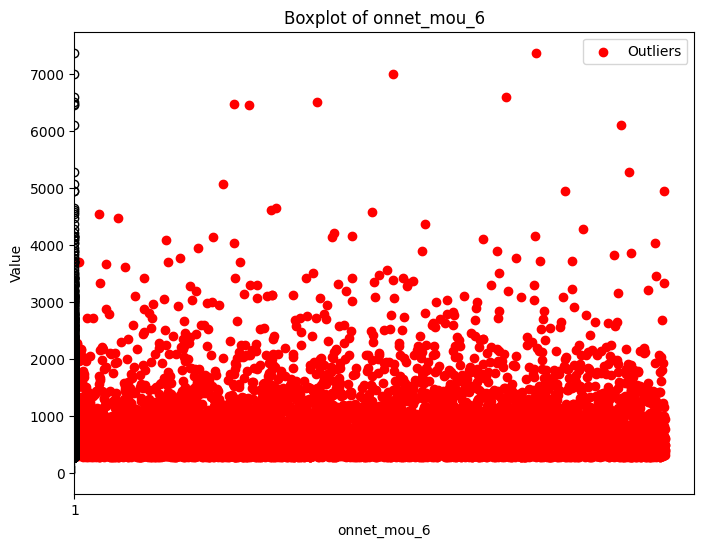

Number of outliers in 'onnet_mou_6': 8433


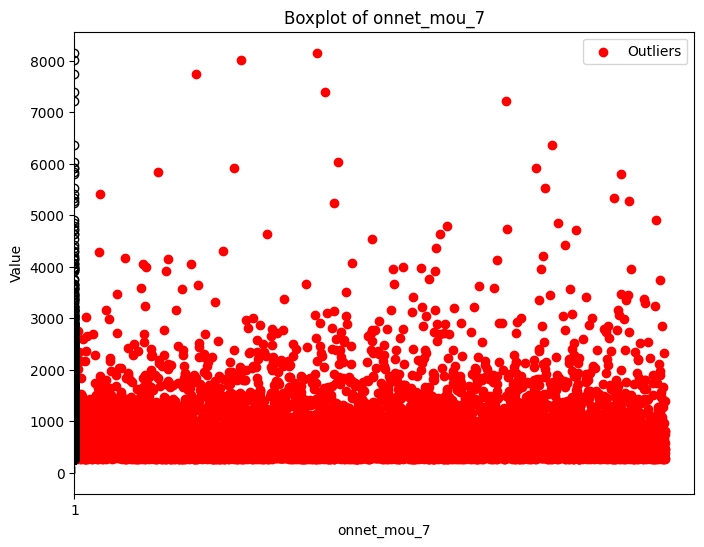

Number of outliers in 'onnet_mou_7': 8701


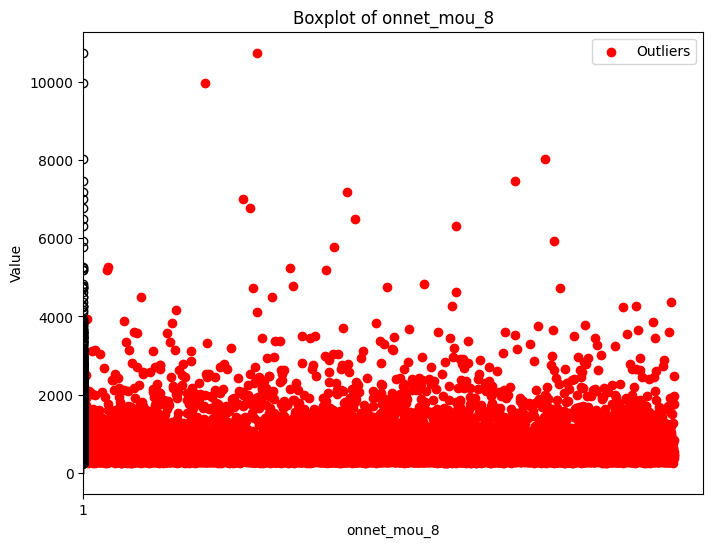

Number of outliers in 'onnet_mou_8': 8752


In [128]:


def detect_and_visualize_outliers(df, column_names):
  """
  Detects and visualizes outliers in multiple columns of a DataFrame using IQR.

  Args:
      df (pandas.DataFrame): The DataFrame containing the columns to analyze.
      column_names (list): A list of column names to check for outliers.
  """

  for col in column_names:
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Create a box plot to visualize outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Value")

    # Highlight outliers with a different color
    plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')
    plt.legend()
    plt.show()

    print(f"Number of outliers in '{col}': {len(outliers)}")


column_to_check = ["onnet_mou_6", "onnet_mou_7", "onnet_mou_8"] 
detect_and_visualize_outliers(telecom_data, column_to_check)

### Using Isolation Forest

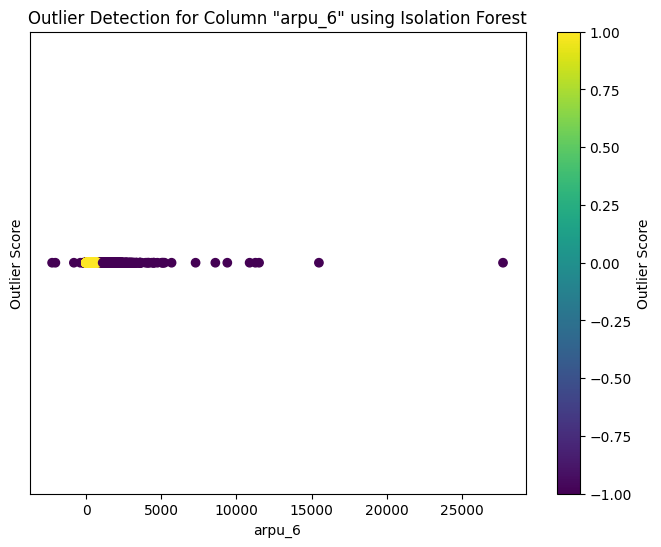

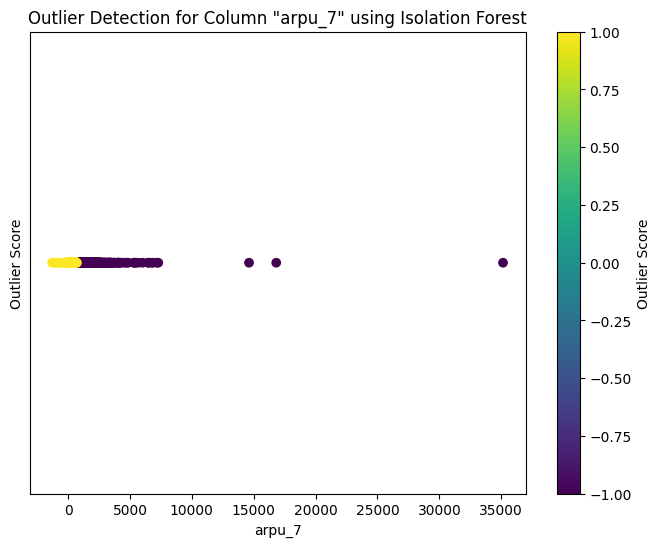

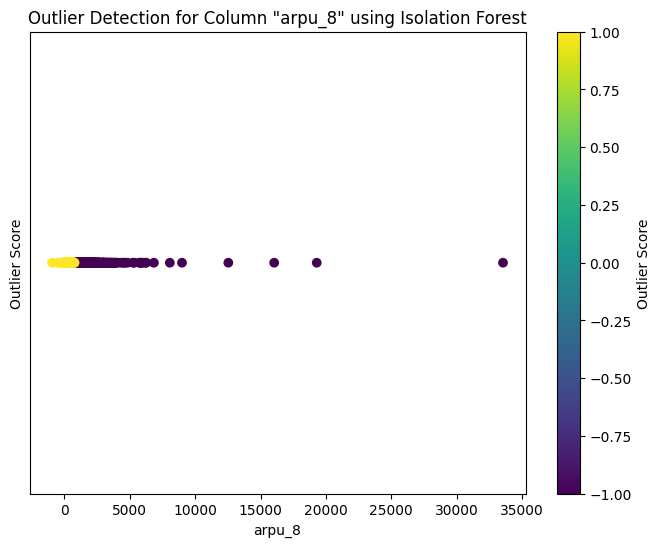

In [126]:
def detect_outliers(df, columns):
    """
    Detects outliers in the DataFrame for each specified column using Isolation Forest and visualizes them.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - columns (list): List of column names for outlier detection.

    Returns:
    - None (prints visualizations).
    """
    # Instantiate the Isolation Forest model
    model = IsolationForest(contamination=0.05)  

    # Iterate over each column for outlier detection and visualization
    for col in columns:
        # Fit the model to the data
        model.fit(df[[col]])

        # Predict outliers
        outliers = model.predict(df[[col]])

        # Visualize outliers
        plt.figure(figsize=(8, 6))
        plt.scatter(df[col], [0]*len(df), c=outliers, cmap='viridis')
        plt.title(f'Outlier Detection for Column "{col}" using Isolation Forest')
        plt.xlabel(col)
        plt.ylabel('Outlier Score')
        plt.yticks([])
        plt.colorbar(label='Outlier Score')
        plt.show()



x=[ 'arpu_6',
 'arpu_7',
 'arpu_8']  # Average revenue per user



detect_outliers(telecom_data, x)

# Basically it looks okay.

In [120]:
def create_plot(x, y, df, plot_type,fig_x_axis,fig_y_axis):
    """
    Create different types of plots based on the parameters.

    Parameters:
    - x: Column name for the x-axis
    - y: Column name for the y-axis
    - df: DataFrame containing the data
    - plot_type: Type of plot to be created ('bar', 'box', 'line', etc.)
    - title: Title for the plot

    Returns:
    - None
    """
    plt.figure(figsize=(fig_x_axis, fig_y_axis))  # Adjust the figure size as needed

    if plot_type == 'bar':
        sns.barplot(x=x, y=y, data=df)
        title = f'Bar Plot for {x} vs {y}'
    elif plot_type == 'count':
        sns.countplot(x=x, data=df)
        title = f'Count Plot for {x}'
    elif plot_type == 'box':
        sns.boxplot(x=x, y=y, data=df)
        title = f'Box Plot for {x} vs {y}'
    elif plot_type == 'line':
        sns.lineplot(x=x, y=y, data=df)
        title = f'Line Plot for {x} vs {y}'
    elif plot_type == 'dist':
        sns.distplot(df[x].dropna(), kde=False, bins=20)  # Adjust parameters as needed
        title = f'Distribution Plot for {x}'
    elif plot_type == 'hist':
        plt.hist(df[x].dropna(), bins=20)  # Adjust parameters as needed
        title = f'Histogram for {x}'
    elif plot_type == 'barchart':
        df[x].value_counts().plot(kind='bar')
        title = f'Bar Chart for {x}'
    elif plot_type == 'pie':
        plt.pie(df[x].value_counts(), labels=df[x].value_counts().index, autopct='%1.1f%%', startangle=90)
        title = f'Pie Chart for {x}'
    elif plot_type == 'heat':
        sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
        title = f'Heat Map for {df.shape[0]}'
    elif plot_type == 'joint':
        sns.jointplot(x = df[x], y = df[y])
        title = f'Joint Plot for {df.shape[0]}'

    else:
        print('Please provide appropriate request')

    plt.show()
    print('\n\n\n\n')

/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


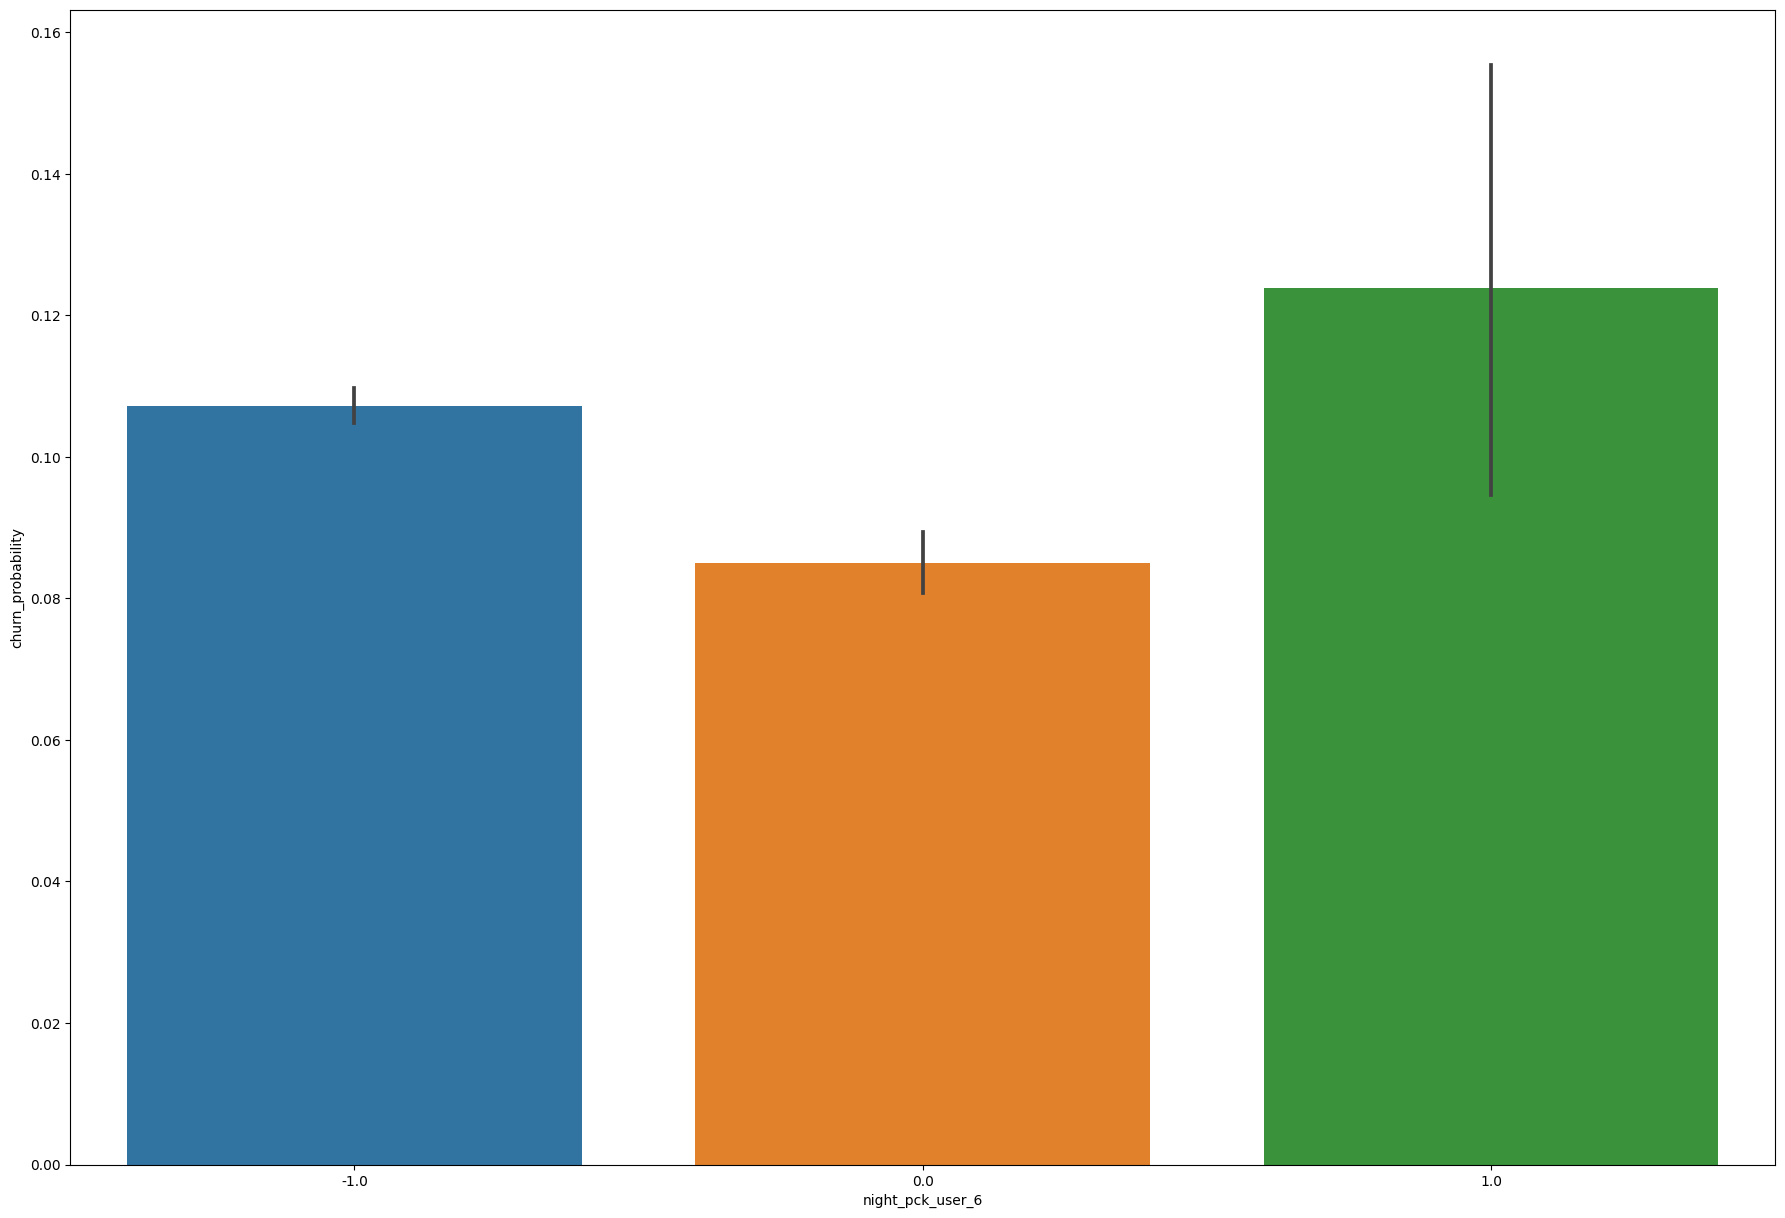

/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


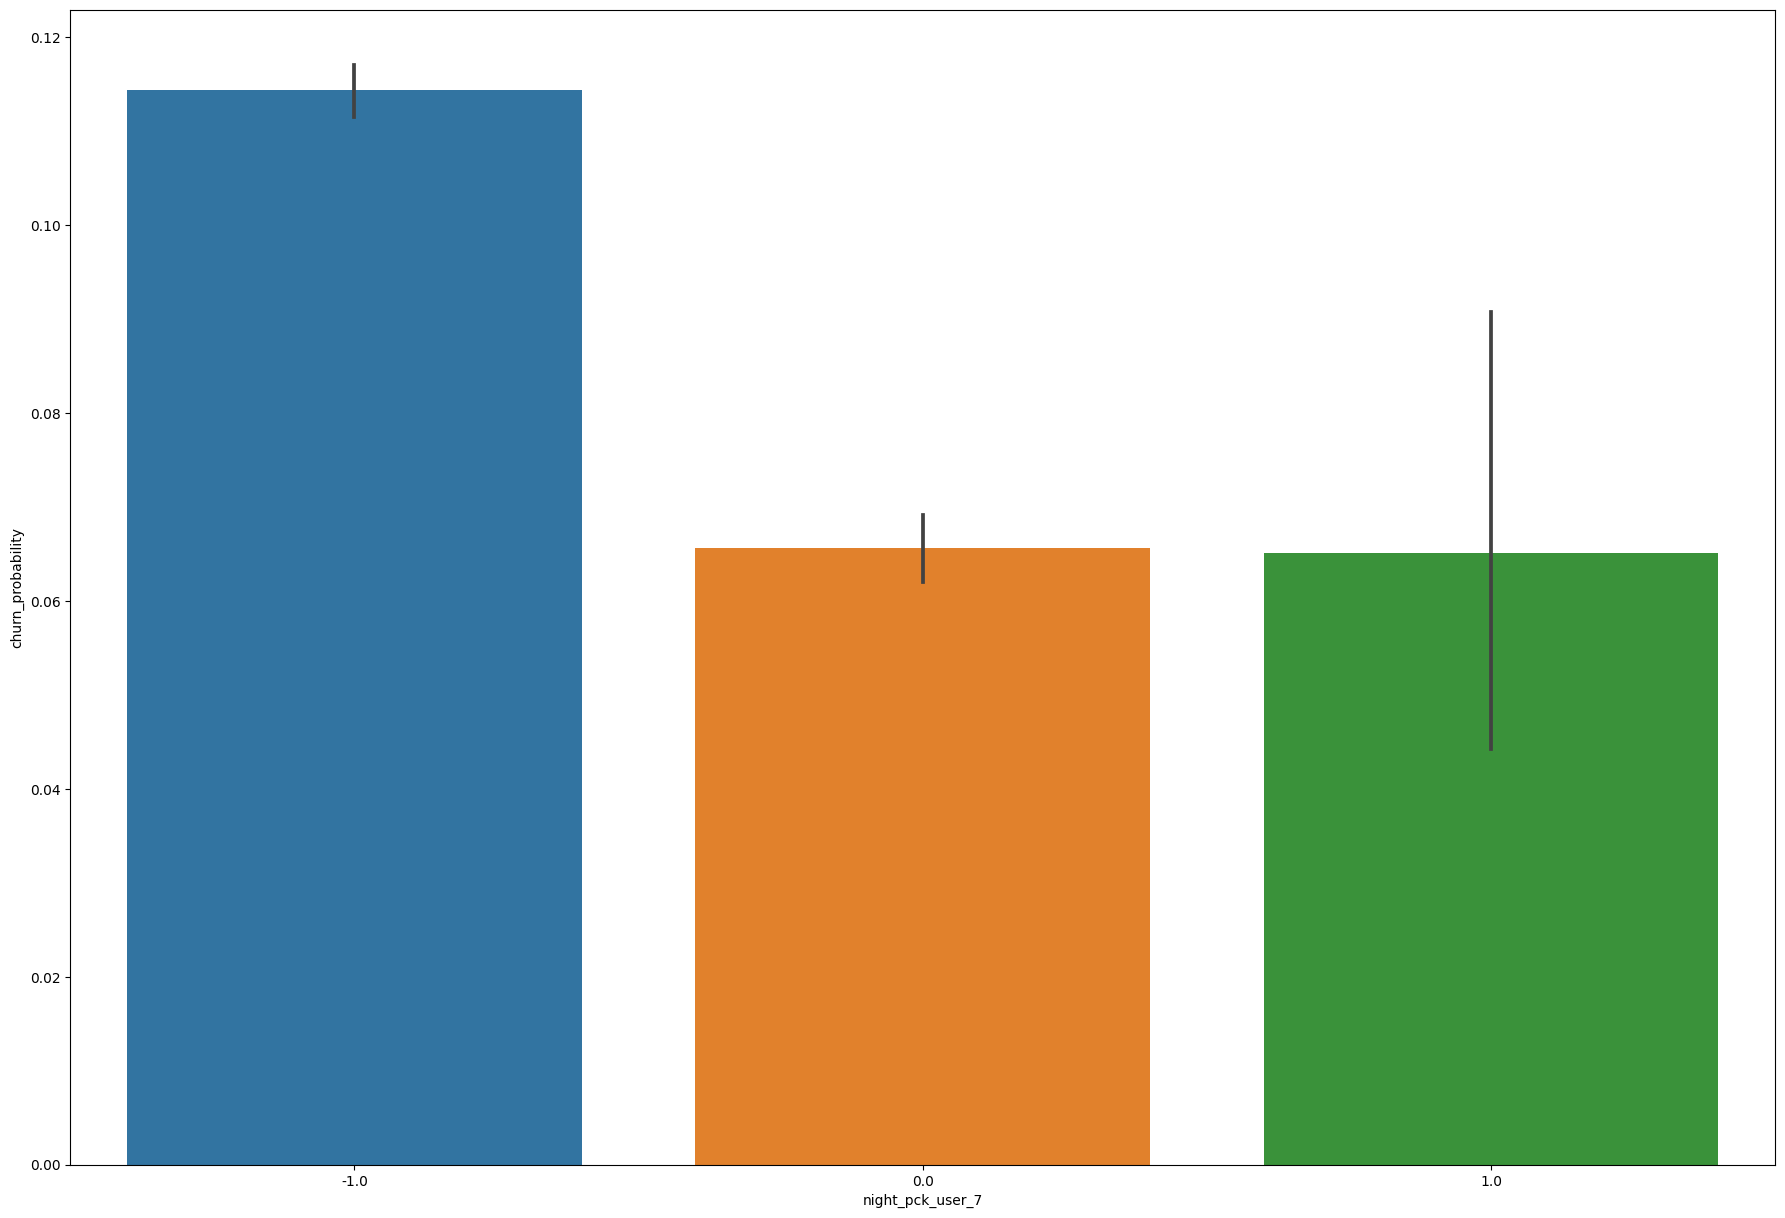

/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


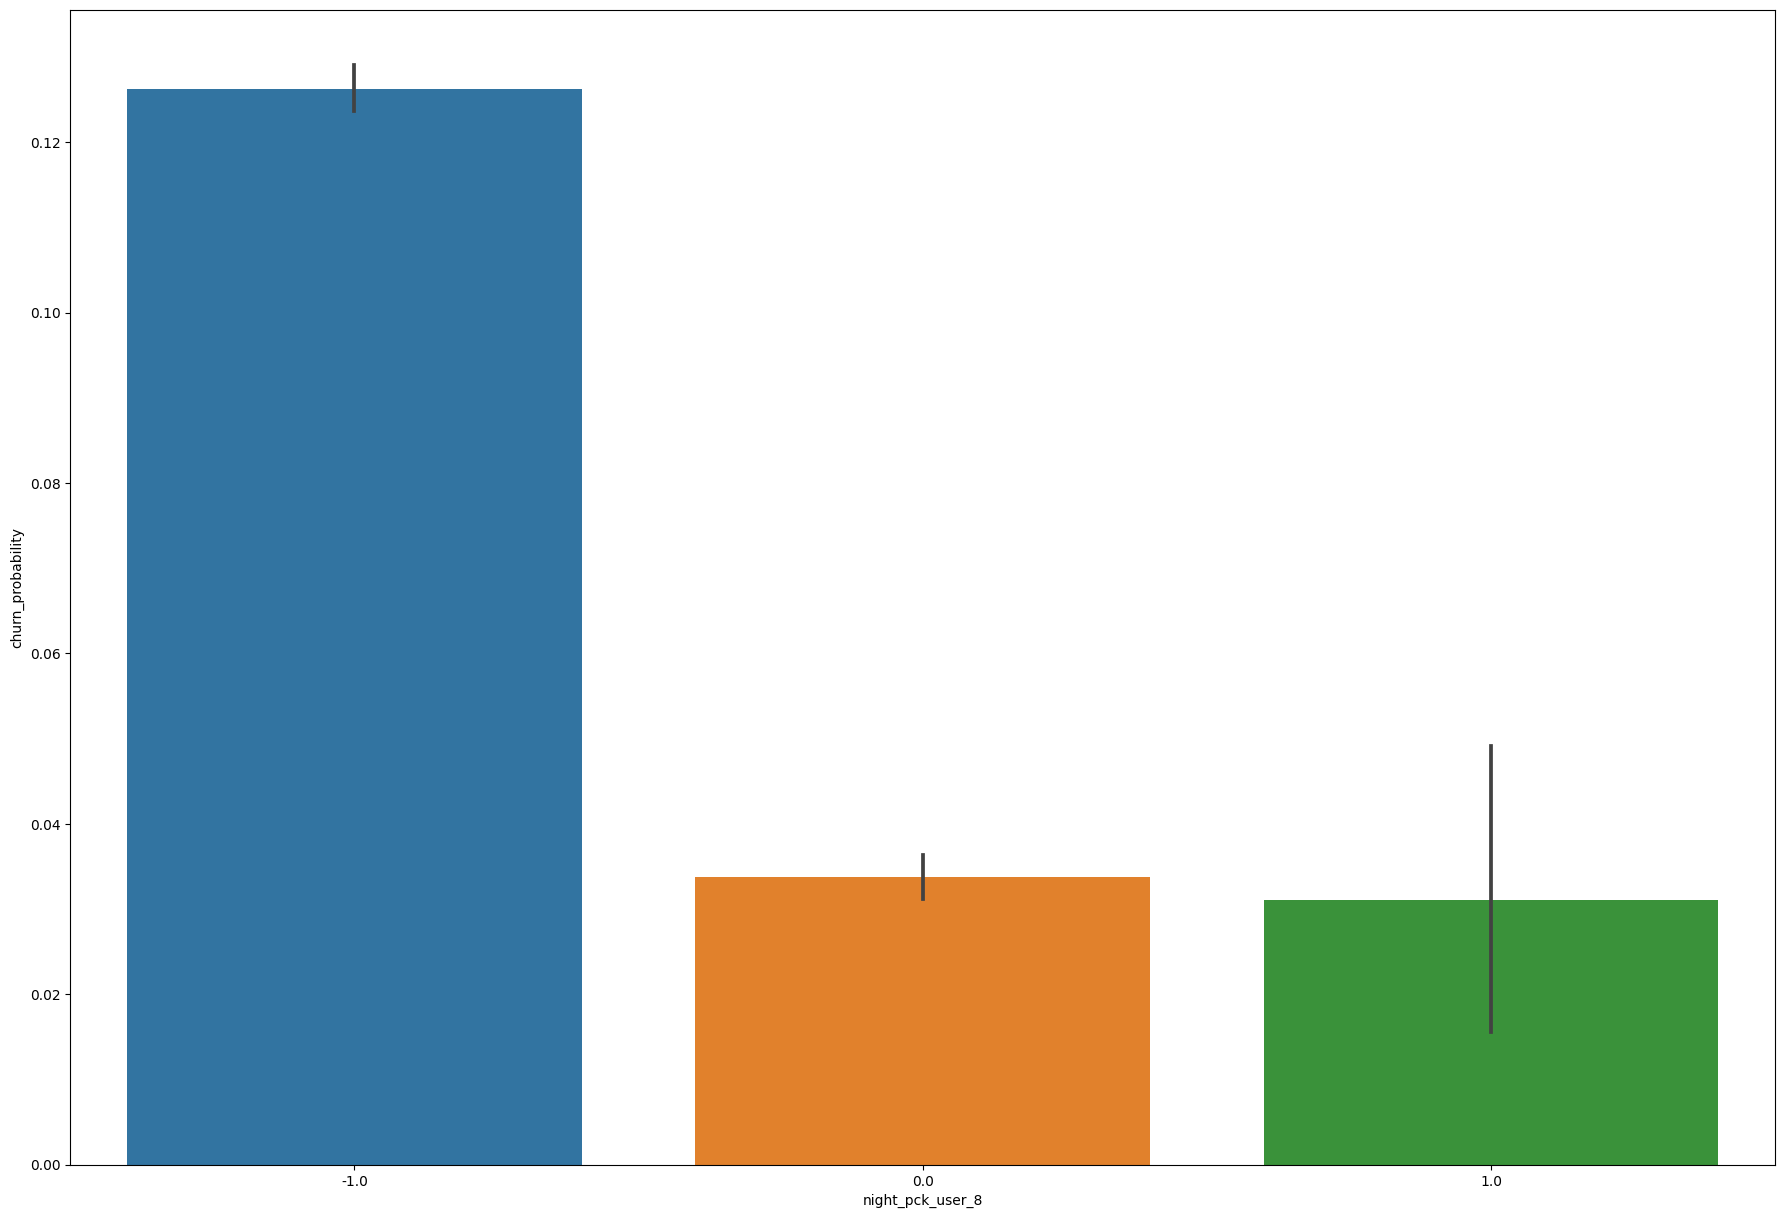

In [122]:
y='churn_probability'
x=['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']


for col in x:
    create_plot(col,y,telecom_data,'bar',22,15)

/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


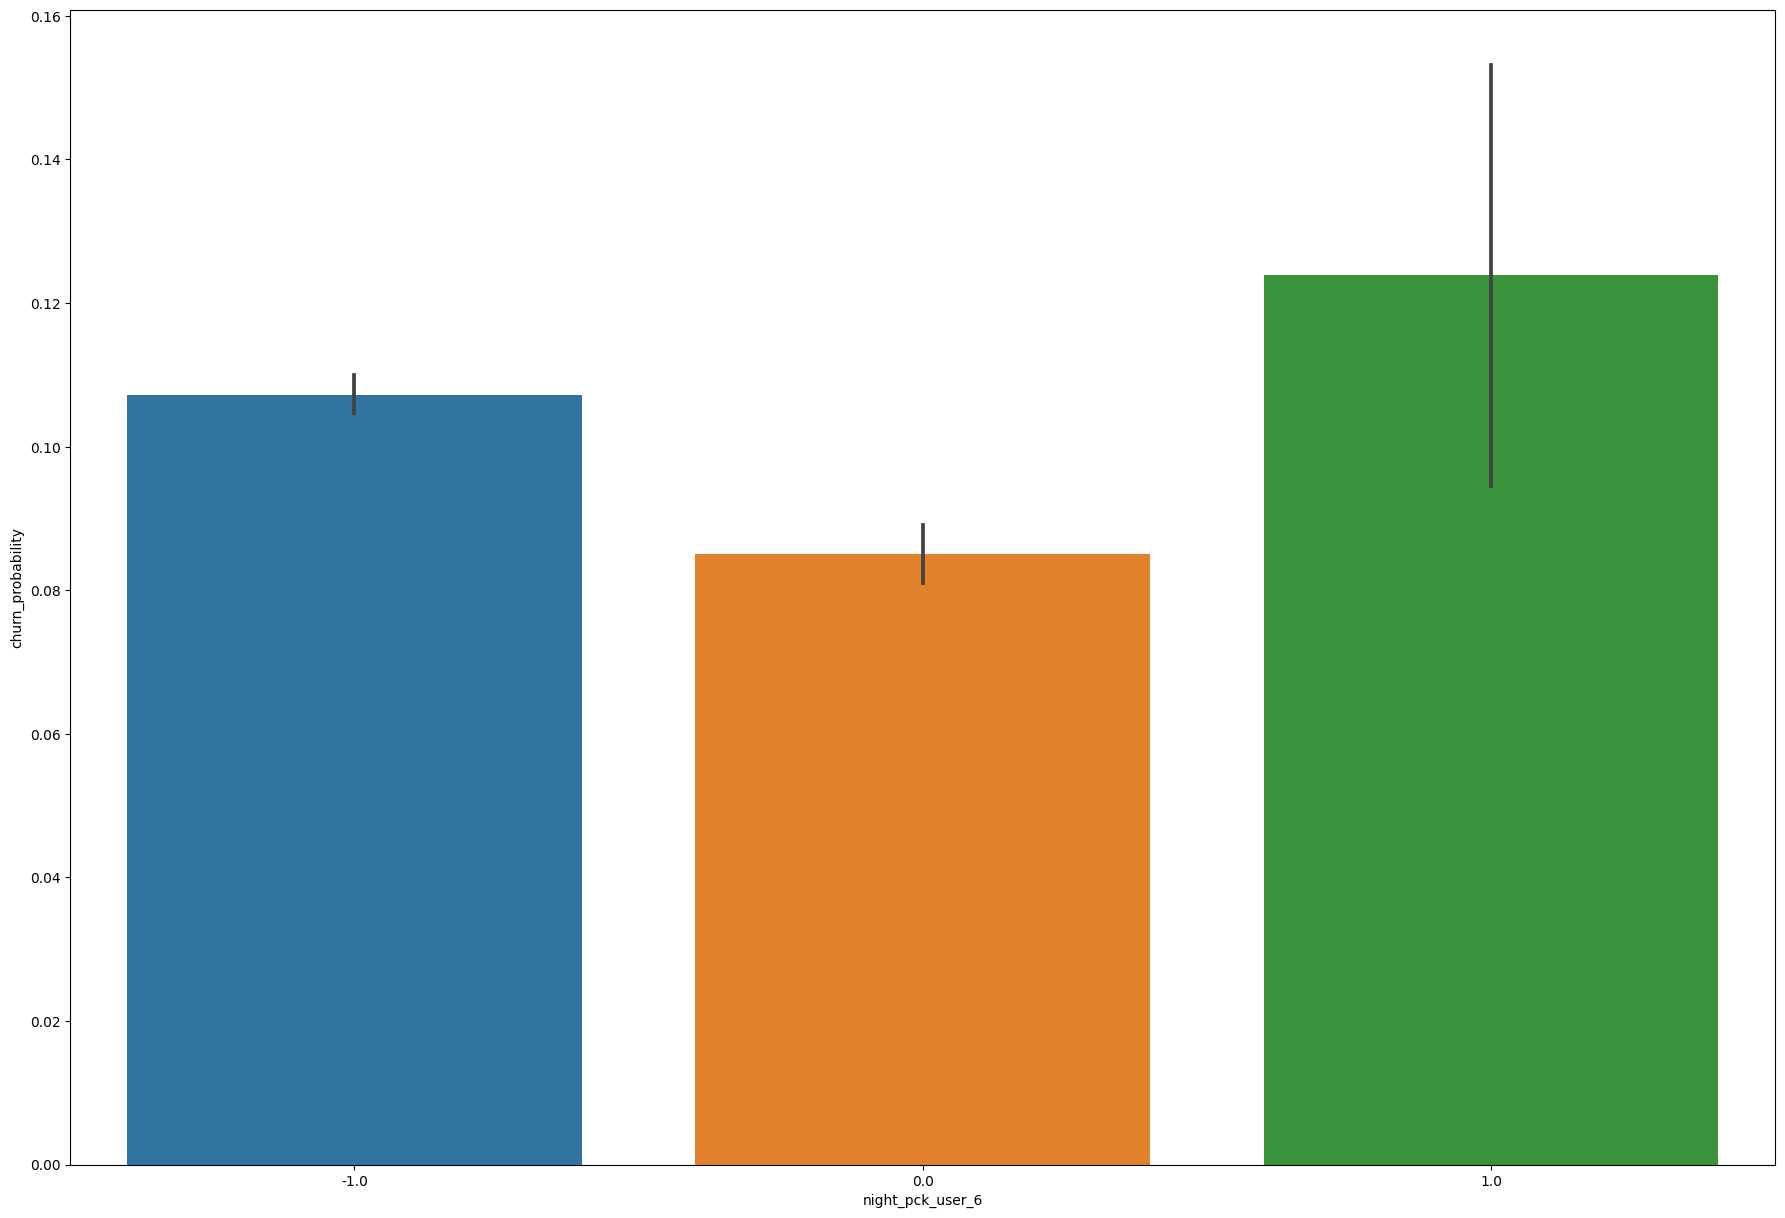

/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


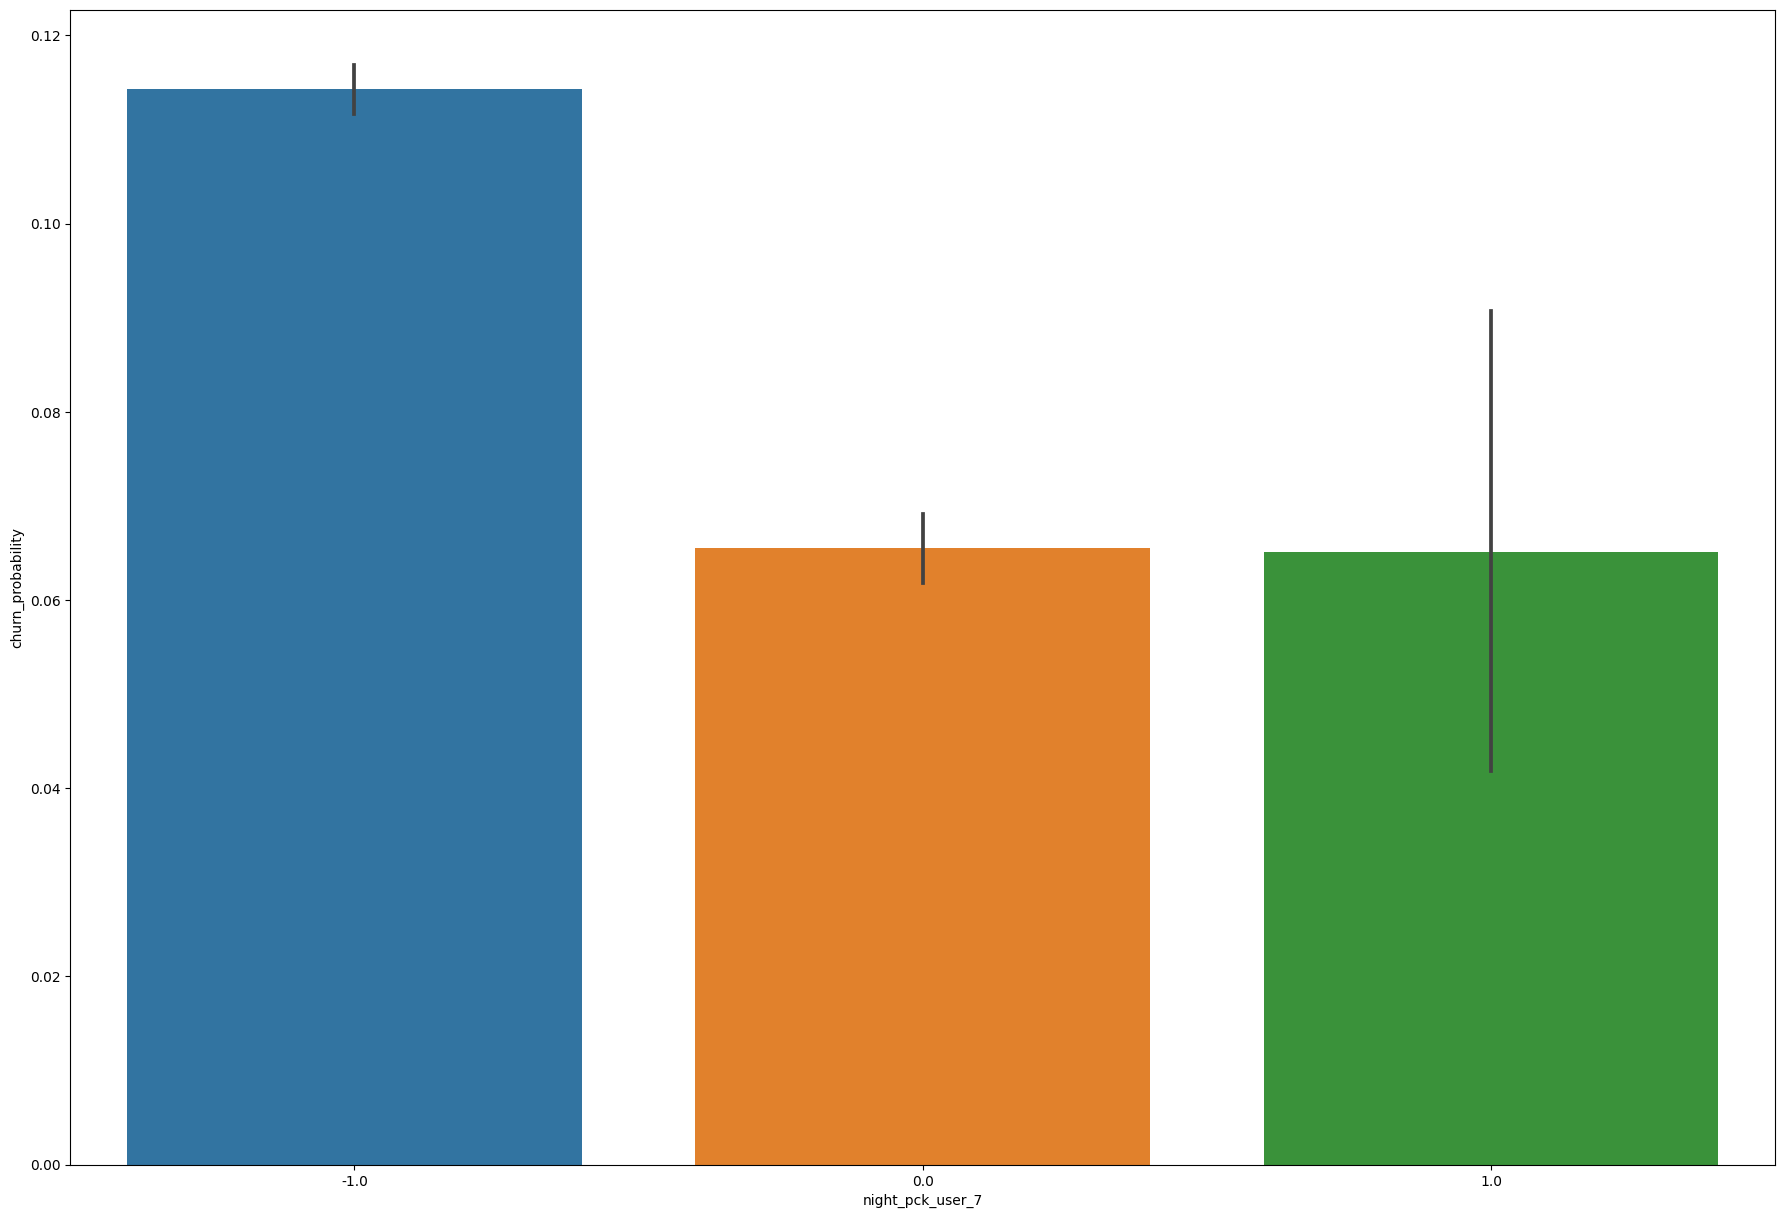

/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


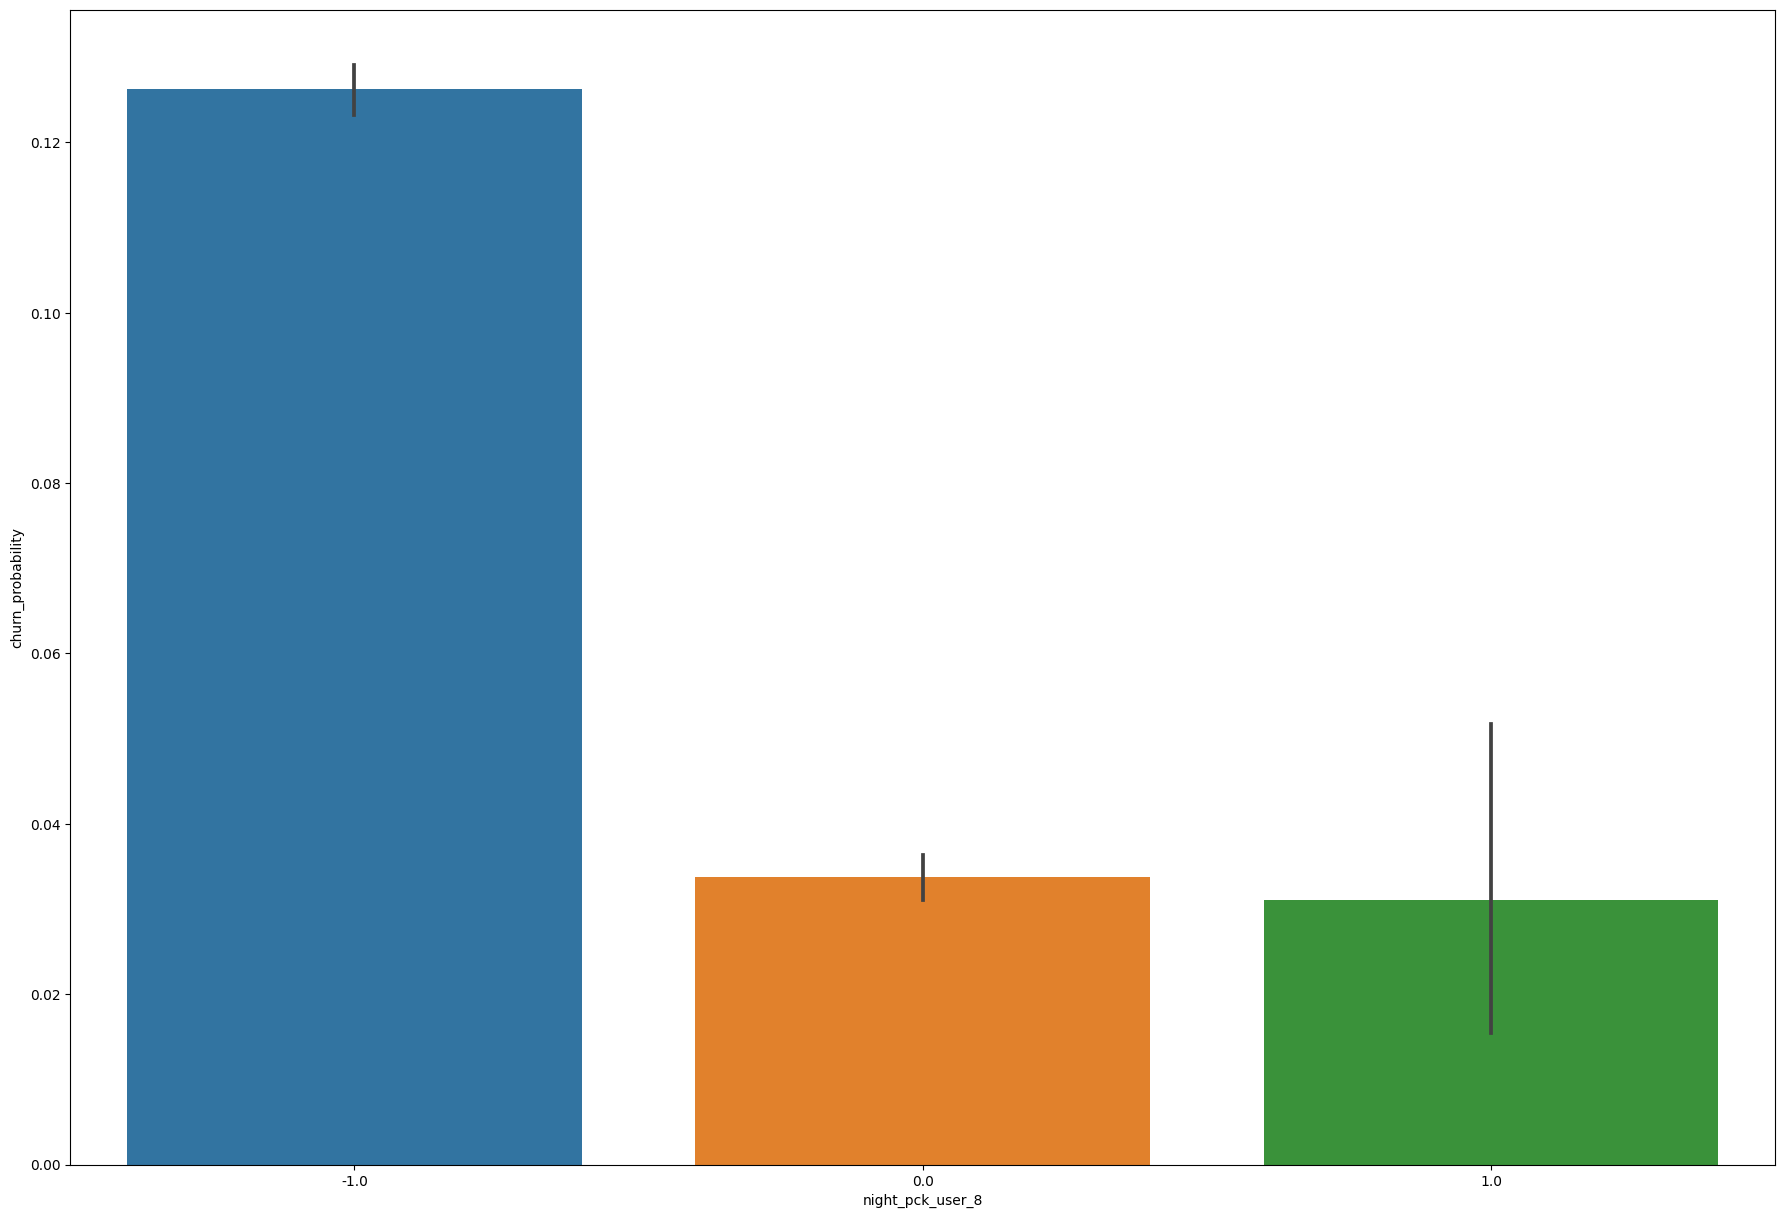

In [130]:
y='churn_probability'
x=['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']


for col in x:
    create_plot(col,y,telecom_data,'bar',22,15)

/var/folders/x0/69vklmkd76s0_014lrw862j00000gn/T/ipykernel_34555/3018948995.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x].dropna(), kde=False, bins=20)  # Adjust parameters as needed


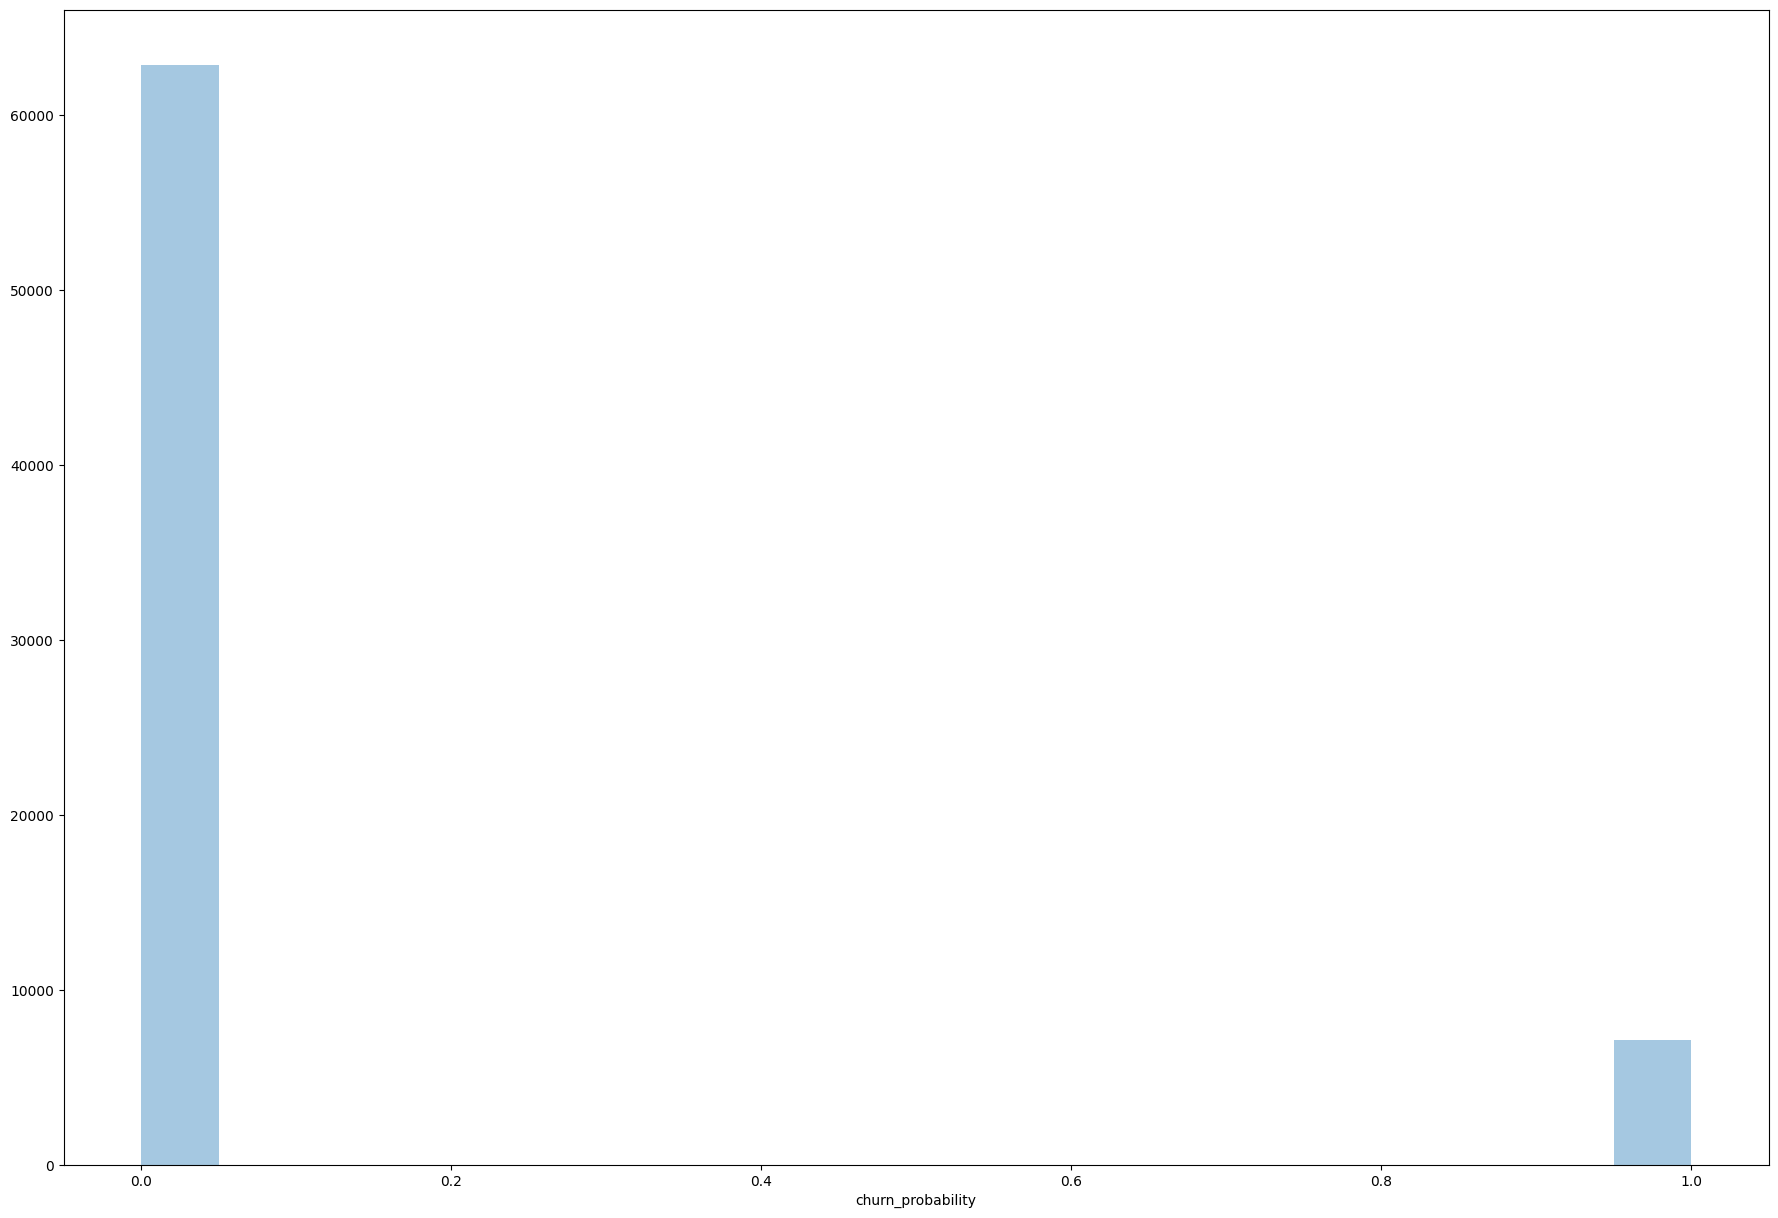

In [131]:
create_plot('churn_probability','',telecom_data,'dist',22,15)


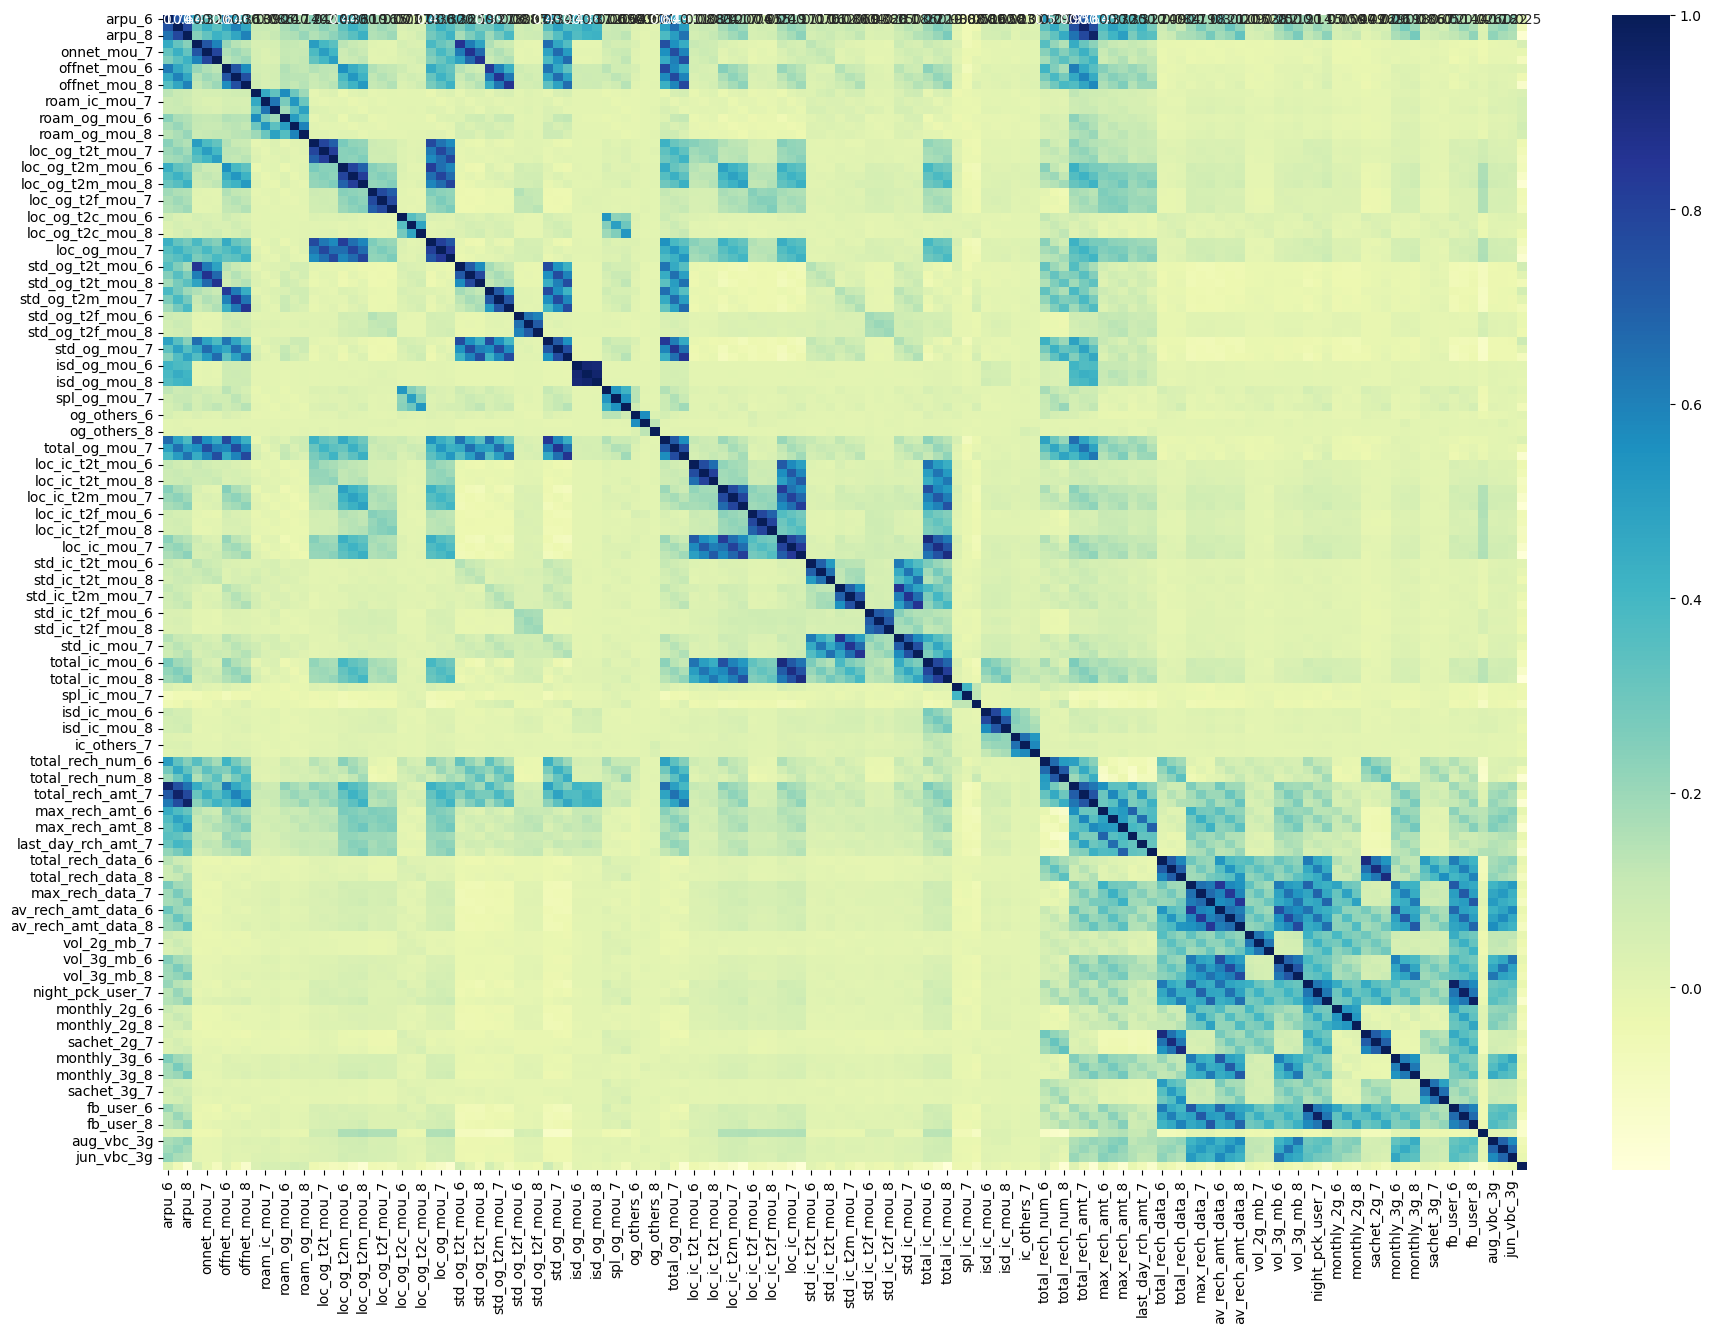

In [132]:
create_plot('churn_probability','',telecom_data,'heat',22,15)


/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sudipkandel/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


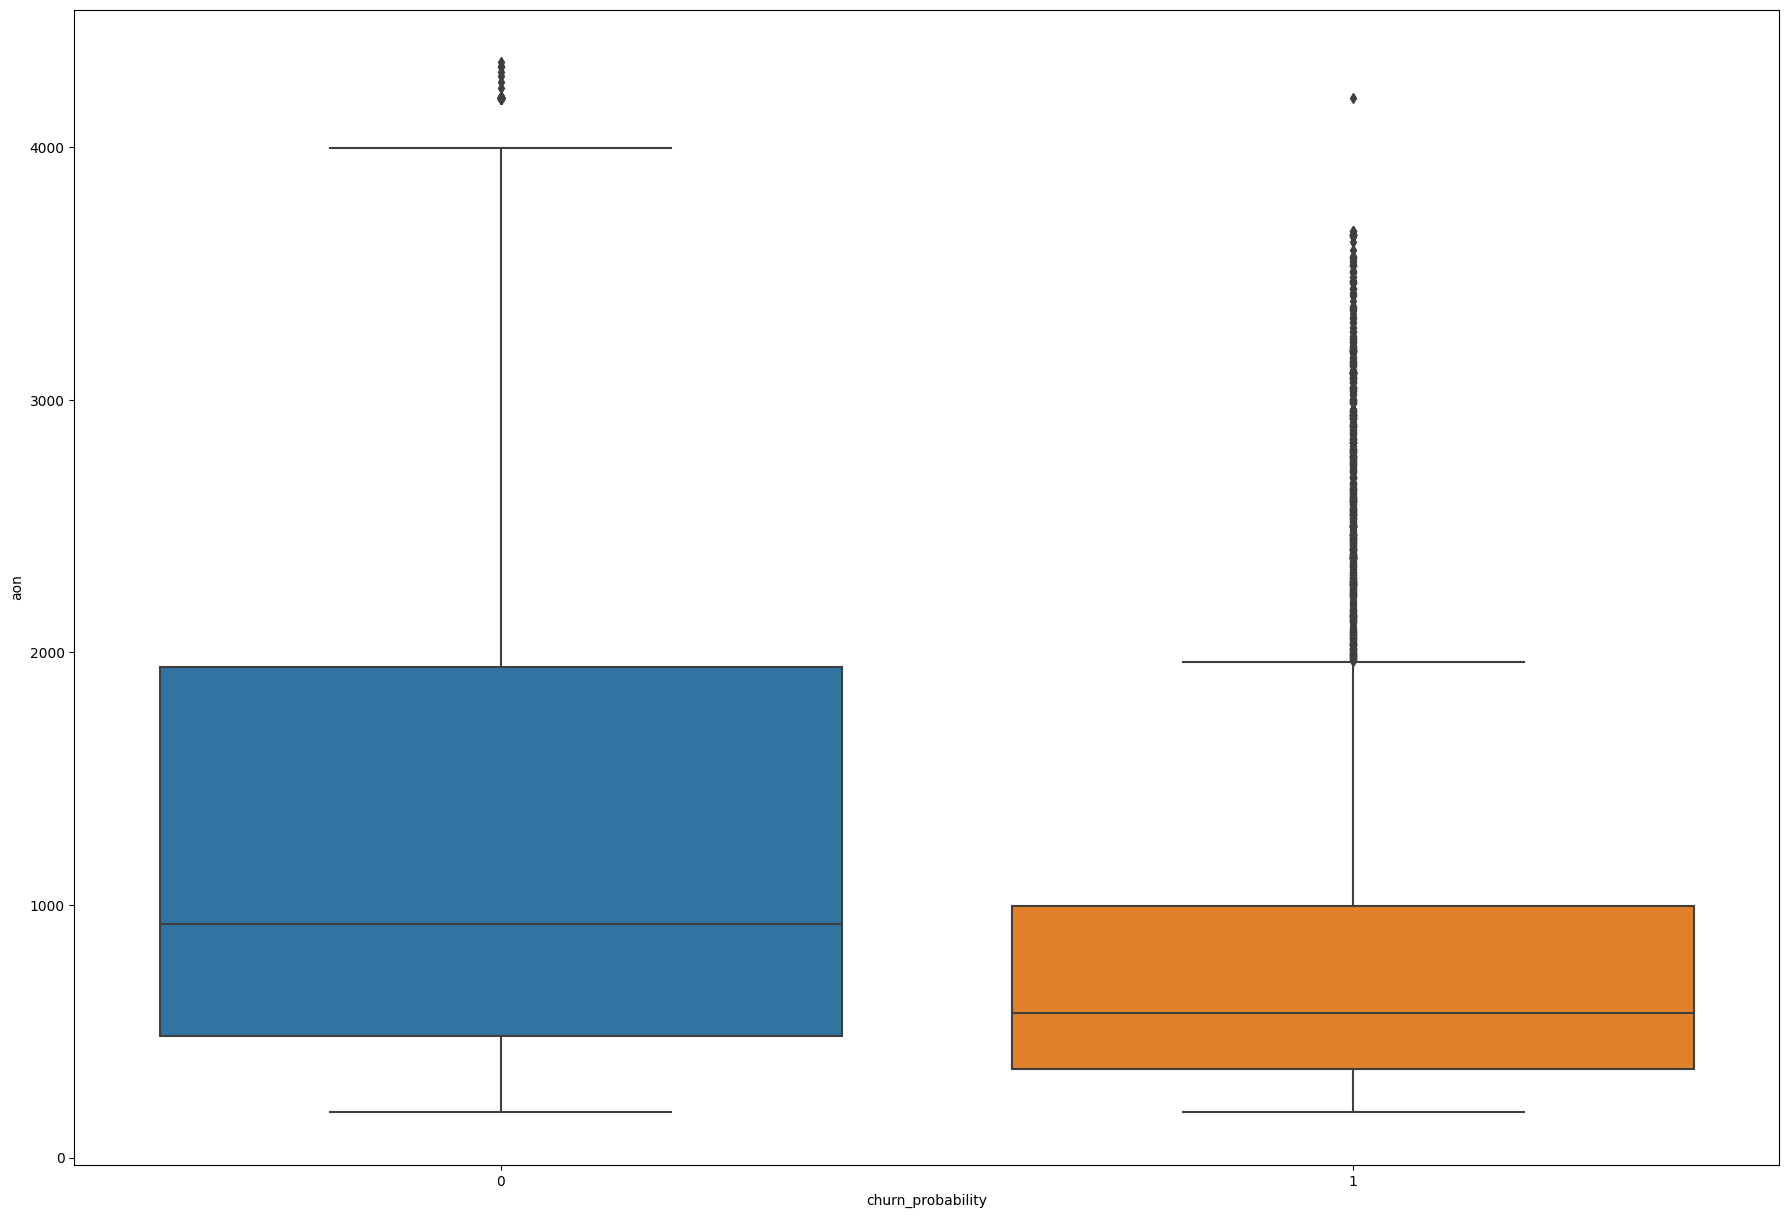

In [134]:
create_plot('churn_probability','aon',telecom_data,'box',22,15) # Age of number of days customer is using the network


night_pck_user_8        -1.0        0.0        1.0
churn_probability                                 
0                  87.375441  96.627842  96.899225
1                  12.624559   3.372158   3.100775


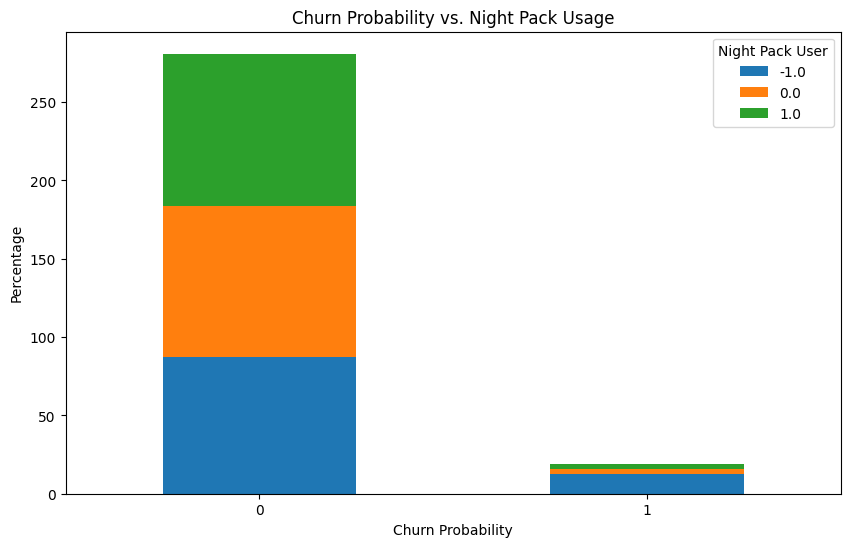

In [141]:
cross_tab = (pd.crosstab(telecom_data['churn_probability'], telecom_data['night_pck_user_8'], normalize='columns') * 100)
print(cross_tab)
# Visualization
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Probability vs. Night Pack Usage')
plt.xlabel('Churn Probability')
plt.ylabel('Percentage')
plt.xticks(rotation=0) 
plt.legend(title='Night Pack User')
plt.show()

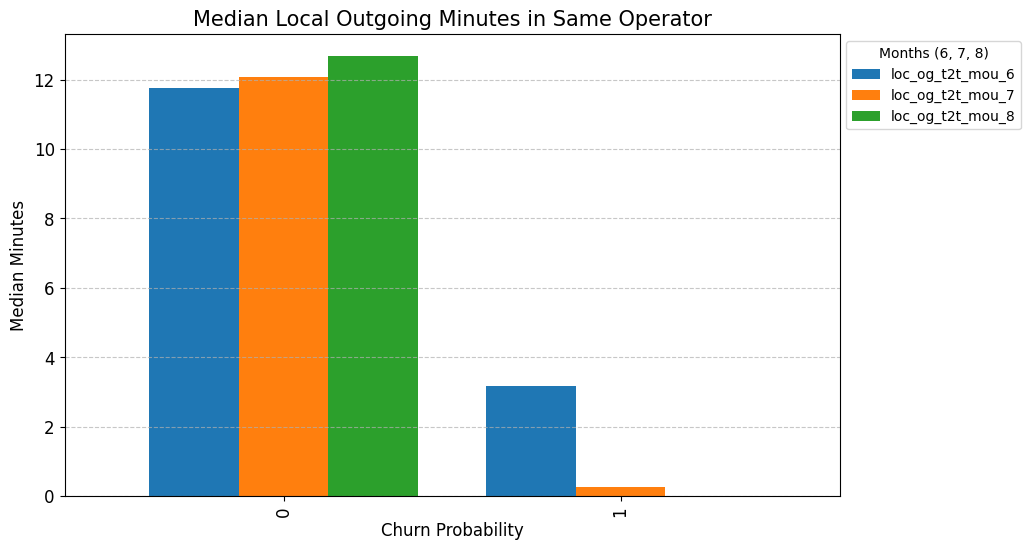

In [148]:

# Grouping by churn_probability and calculating the median of loc_og_t2t_mou for months 6, 7, and 8
median_loc_og_t2t = telecom_data.groupby("churn_probability")[["loc_og_t2t_mou_6", "loc_og_t2t_mou_7", "loc_og_t2t_mou_8"]].median()

# Plotting
ax = median_loc_og_t2t.plot(kind='bar', figsize=[10, 6], width=0.8)
ax.set_title("Median Local Outgoing Minutes in Same Operator", fontsize=15)
ax.set_ylabel("Median Minutes", fontsize=12)
ax.set_xlabel("Churn Probability", fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Months (6, 7, 8)')

plt.show()

# Model Building